Classification of cancer cells as benign or malignant using KNearestNeighbors and the scikitlearn breast cancer dataset

In [58]:
#importing the breast cancer data from sklearn
from sklearn.datasets import load_breast_cancer

In [59]:
#loading the breast_cancer_data into a variable
breast_cancer_data = load_breast_cancer()

In [60]:
#data inspection
print(breast_cancer_data.data[0])

[1.799e+01 1.038e+01 1.228e+02 1.001e+03 1.184e-01 2.776e-01 3.001e-01
 1.471e-01 2.419e-01 7.871e-02 1.095e+00 9.053e-01 8.589e+00 1.534e+02
 6.399e-03 4.904e-02 5.373e-02 1.587e-02 3.003e-02 6.193e-03 2.538e+01
 1.733e+01 1.846e+02 2.019e+03 1.622e-01 6.656e-01 7.119e-01 2.654e-01
 4.601e-01 1.189e-01]


In [61]:
print(breast_cancer_data.feature_names)

['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [62]:
#to know what we are trying to classify
print(breast_cancer_data.target)
print()
print(breast_cancer_data.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [63]:
#splitting the data into training and validation sets
from sklearn.model_selection import train_test_split
training_data, validation_data, training_labels, validation_labels = train_test_split(breast_cancer_data.data, breast_cancer_data.target, test_size = 0.2, random_state = 42)
#to confirm the train_test_split worked correctly, data and labels lenghts should be equal
print(len(training_data))
print(len(training_labels))

455
455


In [64]:
#importing the KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#training the classifier 
accuracies = []
for k in range(1,101): #to try different K values
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(training_data, training_labels)
  #to check the accuracy of the classifier
  accuracies.append(classifier.score(validation_data, validation_labels))

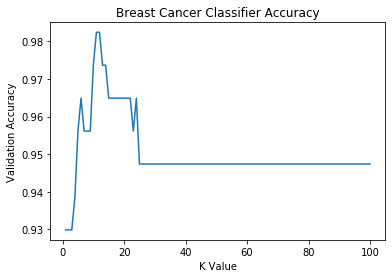

In [65]:
#graphing the accuracy at each K value
import matplotlib.pyplot as plt

k_list = range(1,101)

plt.plot(k_list, accuracies)
plt.xlabel('K Value')
plt.ylabel('Validation Accuracy')
plt.title("Breast Cancer Classifier Accuracy")
plt.show()

In [66]:
#to check the value of K that gives the highest accuracy we can return the index of the max value in the list of accuracies  
best_kval = accuracies.index(max(accuracies))
accuracy_at_best_kval = max(accuracies) * 100
print("The best value of K is " +str(best_kval)+ " which gives an accuracy of %.2f" % accuracy_at_best_kval +"%")
#The highest value of K was 10 with an accuracy of about 98%

The best value of K is 10 which gives an accuracy of 98.25%
